# Correlated (multivariate) normal random variables

In [1]:
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

## Two correlated normal random variables

In [2]:
xnorm = np.random.normal(size=10000)
ynorm = np.random.normal(size=10000)

In [3]:
np.corrcoef(xnorm, ynorm)

array([[ 1.00e+00, -9.33e-04],
       [-9.33e-04,  1.00e+00]])

In [4]:
rho = 0.75
ynorm = rho*xnorm + np.sqrt(1-rho**2)*ynorm

In [5]:
np.corrcoef(xnorm, ynorm)

array([[1.   , 0.753],
       [0.753, 1.   ]])

## Sigma (std) and correlation matrix

In [6]:
sig_v = np.array([2, 5, 2])
cor_m = np.array([[1, 0.7, -0.2], [0.7, 1, 0.5], [-0.2, 0.5, 1]])
print(sig_v, '\n', cor_m)

[2 5 2] 
 [[ 1.   0.7 -0.2]
 [ 0.7  1.   0.5]
 [-0.2  0.5  1. ]]


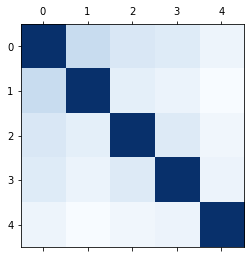

In [7]:
# You can also create random Correlation matrixs

n_asset = 5
eig_val = np.random.uniform(size=n_asset)
eig_val *= n_asset / np.sum(eig_val)
# sum of eig_val = n_asset

np.random.seed(123456)
cor_m2 = spst.random_correlation.rvs(eig_val, tol=1e-8)
_ = plt.matshow(cor_m2, cmap=plt.cm.Blues)

### Construct Covariance Matrix

In [8]:
sig_v[:,None]

array([[2],
       [5],
       [2]])

In [9]:
sig_v[:,None] * sig_v * cor_m

array([[ 4. ,  7. , -0.8],
       [ 7. , 25. ,  5. ],
       [-0.8,  5. ,  4. ]])

Covariance and correlation matrices:
$$ \Sigma_{ij} = \sigma_i R_{ij} \sigma_j $$

In [10]:
cov_m = sig_v[:,None] * cor_m * sig_v 
print(cov_m)

[[ 4.   7.  -0.8]
 [ 7.  25.   5. ]
 [-0.8  5.   4. ]]


### Cholesky decomposition of covariance matrix

In [11]:
chol_m = np.linalg.cholesky(cov_m)
print(chol_m)

[[ 2.     0.     0.   ]
 [ 3.5    3.571  0.   ]
 [-0.4    1.792  0.792]]


In [12]:
# Let's verify that L x L^T = Covariance

print( chol_m @ chol_m.T, '\n' )
print( chol_m @ chol_m.T - cov_m )

[[ 4.   7.  -0.8]
 [ 7.  25.   5. ]
 [-0.8  5.   4. ]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [13]:
# Now let's create multivariate normal random variables following the covariance matrix
# First, create standard normals (3 x 1000)

znorm_m = np.random.normal(size=(3, 1000))
znorm_m

array([[ 2.719e-01, -4.250e-01,  5.670e-01, ..., -5.622e-01,  1.596e-03,
         7.755e-02],
       [ 9.897e-01, -1.693e+00,  4.740e-01, ...,  6.823e-01,  4.753e-01,
        -1.457e+00],
       [ 1.557e+00,  9.918e-01, -1.198e+00, ..., -1.838e+00,  1.876e+00,
         4.622e-01]])

In [14]:
np.round(np.cov(znorm_m),3)

array([[ 1.084,  0.021, -0.   ],
       [ 0.021,  1.005, -0.038],
       [-0.   , -0.038,  1.045]])

In [15]:
# Then multiply C^T

#xnorm_m = znorm_m @ chol_m.transpose()
xnorm_m = chol_m @ znorm_m
print(xnorm_m.shape)
xnorm_m

(3, 1000)


array([[ 5.437e-01, -8.499e-01,  1.134e+00, ..., -1.124e+00,  3.192e-03,
         1.551e-01],
       [ 4.486e+00, -7.531e+00,  3.677e+00, ...,  4.683e-01,  1.703e+00,
        -4.931e+00],
       [ 2.899e+00, -2.078e+00, -3.264e-01, ..., -7.911e-03,  2.337e+00,
        -2.276e+00]])

In [16]:
# Let's verify that X = C * Z  follows the covariance
print(cov_m)
cov_m_sample = np.cov( xnorm_m )
print( 'Cov from sample:\n', cov_m_sample )
print( 'Error of Cov matrix:\n', cov_m_sample - cov_m )

[[ 4.   7.  -0.8]
 [ 7.  25.   5. ]
 [-0.8  5.   4. ]]
Cov from sample:
 [[ 4.335  7.734 -0.793]
 [ 7.734 26.609  4.908]
 [-0.793  4.908  3.921]]
Error of Cov matrix:
 [[ 0.335  0.734  0.007]
 [ 0.734  1.609 -0.092]
 [ 0.007 -0.092 -0.079]]


In [17]:
# also check the correation
print(cor_m)
cor_m_sample = np.corrcoef( xnorm_m )
print( 'Corr from sample:\n', cor_m_sample )
print( 'Error:\n', cor_m_sample - cor_m )

[[ 1.   0.7 -0.2]
 [ 0.7  1.   0.5]
 [-0.2  0.5  1. ]]
Corr from sample:
 [[ 1.     0.72  -0.192]
 [ 0.72   1.     0.48 ]
 [-0.192  0.48   1.   ]]
Error:
 [[-2.220e-16  2.010e-02  7.570e-03]
 [ 2.010e-02  0.000e+00 -1.954e-02]
 [ 7.570e-03 -1.954e-02  0.000e+00]]
